# COGS 118A - Final Project

##  X-ray Chest Image Classifications Using Surpervised Machine Learning Models and CNN

# Names of Group 016


- Shiyuan Wang
- Yuntian Wu
- Xinhao Zhao
- Wenyu Zhong

# Abstract 
For our project, we will apply various machine learning algorithms (including supervised machine learning algorithms and CNN) to classify X-ray images of patients' chests under different clinical conditions and make diagnoses automatically. We will use CNN as the benchmark model, and compare its accuracy with those of the other supervised machine learning algorithms' accuracies based on various error metrics and select the algorithms/models with the best performances. We used `Recall` for performance/success of our study.

# Background

  During the COVID-19 pandemic, the scarcity of medical personnel has become an issue worth attention. According to a report by the International Council of Nurses, more than 1,500 nurses have died from COVID-19 worldwide, highlighting the dangers faced by frontline medical personnel.<a name="Council"></a>[<sup>[4]</sup>](#Council)  In such circumstances where medical personnel are scarce, we seek to find a method, using machine learning, to reduce their workload so that the patients can be treated more efficiently. That is why we would like to use machine learning to classify X-ray images for diagnosing COVID-19 patients. 
  
  Image classification using machine learning/AI methods these years has a primary focus in deep learning. Deep learning methods, particularly convolutional neural networks (CNNs), have shown impressive performance on a range of image classification tasks. In a study by LeCun et al., CNNs were shown to outperform traditional machine learning methods on the ImageNet benchmark dataset <a name="Lecunnote"></a>[<sup>[1]</sup>](#Lecun). Another study by Russakovsky et al. demonstrated the effectiveness of transfer learning, which involves using pre-trained models on large datasets to improve performance on smaller datasets <a name="Russakovsky"></a>[<sup>[2]</sup>](#Russakovsky). Image classification of clinical X-ray images has also been a focus of research. For example, a recent study showed that a deep learning model trained on X-ray images was able to accurately diagnose COVID-19 with high sensitivity and specificity, even when performed by non-experts<a name="Wang"></a>[<sup>[3]</sup>](#Wang). For our project, we will comapre different supervised machine learning algorithms with the already established CNN approach for image classification by comparing their accuracies. 

# Problem Statement

Specifically, we are focusing on the problem of whether we can rely on machine learning algorithms for diagnosing COVID-19 based on X-ray images of patients’ chests. This is quantifiable because we can use labeled image datasets and measure the algorithms’ accuracies (such as recall) in correctly classifying the images (e.g. classifying an image of a COVID patient as COVID-positive). The problem is also replicable in that once we have built our machine-learning models, people can use them to run more datasets to verify their usability, aside from our seven-thousand images. Finally, one potential ML solution to this problem is CNN (as discussed in the background section), which is a deep learning approach to tackle the task of image classification. Other than this, random forest is also a feasible machine learning algorithm for this task.

# Data

The dataset comprises two folders (train, test) and includes subfolders for every image category (Normal/Pneumonia/Covid-19/Tuberculosis), with a total of 7135 x-ray images available.
 - Reference: https://www.kaggle.com/datasets/jtiptj/chest-xray-pneumoniacovid19tuberculosis
 - Size of the dataset: 7135 x-ray images in four ; four variables:Covid-19,Pneumonia,Tuberculosis, Normal; after our data preprocessing, we take 450 images for each label.
 - Observation: Each observation in this dataset is an image of either OCT or chest X-ray.
 - Critical Variables: The critical variables in this dataset are the image category (Normal/Pneumonia/Covid-19/Tuberculosis) for chest X-ray images and disease type (CNV, DME, DRUSEN, NORMAL) for OCT images.
 - Special Handling/Transformations/Cleaning: Since we would like to use CNN, SVM, Random forest and KNN to predict the accuracy of the image classification. We did the following preprocessor to properly prepare the data before feeding it into the network. 
    1. Data Preprocessing: The code loads and resizes the images from the training and test directories and stores them in numpy arrays. The dictionary of classes is defined with corresponding labels, and the training data is sampled so that the count of each label is balanced. Only 450 data samples are taken from each label, and any additional data samples are ignored. The data is then transformed into a 2D numpy array. Please see the code below.
    2. After conducting data cleaning procedures, which involved removing any corrupt or irrelevant data, we specifically resized the images in the dataset. Following this, we selected a subset of 450 images from each label based on predetermined criteria to solve the image imbalance problem. These measures were taken to ensure that the dataset used for subsequent analysis and modeling was of high quality and appropriate for the intended purposes. Therefore the images are already in a standard format, such as JPEG or PNG, and are typically normalized, resized, and transformed to ensure consistency. In addition, the images have already been categorized and labeled.
    3. For answering the question of how to merge four sets of data into one, we specifically resized the images in the dataset. Following this, we selected a subset of only 450 images from the complete dataset based on predetermined criteria, such as image quality and content relevance. These measures were taken to ensure that the dataset used for subsequent analysis and modeling was of high quality and appropriate for the intended purposes.
    4. Regarding class imbalance, the code ensures that the training set is balanced for each label by taking only 450 data samples from each label. A default dictionary is used to keep track of the count of each label, and any additional data samples are ignored. The proportion of classes in the training data is visualized using a pie chart.
       Furthermore, the training and test datasets are usually provided separately, which means that there is no need to split the data manually. Additionally, if the images are already properly labeled, there is no need to remove any duplicates, outliers, or incorrect labels.

In summary, for image classification tasks using CNNs, the need for data cleaning may be minimal or non-existent if the dataset is already properly preprocessed, labeled, and separated into training, validation, and test sets. However, it is always important to carefully review and understand the dataset before proceeding with training the model.

In [ ]:
# import libraries
import os
import glob
import numpy as np
import tensorflow as tf
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.preprocessing.image import load_img
from collections import defaultdict

In [ ]:
# define paths to train, validation, and test folders
train_dir = "/home/w1zhong/teams/group016/resize_train"
test_dir = "/home/w1zhong/teams/group016/resize_test"

# Define dictionary of classes
classes = {'COVID19': 0, 'NORMAL': 1, 'PNEUMONIA': 2, 'TURBERCULOSIS': 3}
label_dict = {0: 'COVID19', 1: 'NORMAL', 2: 'PNEUMONIA', 3: 'TURBERCULOSIS'}

# Define Empty list for train,test and val dataset and labels.
train_data = []
train_labels = []
test_data = []
test_labels = []

# Default dict used to keep track of the count of each label in order to make the training set balanced
count = defaultdict(int)

# Load training data
for folder_name in os.listdir(train_dir):
    folder_path = os.path.join(train_dir, folder_name)
    for img_path in glob.glob(os.path.join(folder_path, "*.*g")):
        label = classes[folder_name.upper()]
        if count[label] > 460:
            continue
        count[label] += 1
        img = load_img(img_path, target_size=(400, 400))
        img_array = np.array(img)
        train_data.append(img_array)
        train_labels.append(label)
        
# Load test data
for folder_name in os.listdir(test_dir):
    folder_path = os.path.join(test_dir, folder_name)
    for img_path in glob.glob(os.path.join(folder_path, "*.*g")):
        img = load_img(img_path, target_size=(400, 400))
        img_array = np.array(img)
        test_data.append(img_array)
        label = classes[folder_name.upper()]
        test_labels.append(label)

# Convert to numpy arrays
train_data = np.array(train_data)
train_labels = np.array(train_labels)
test_data = np.array(test_data)
test_labels = np.array(test_labels)

# Tranform data into Numpy Array and reshape to 2D
train_data = np.array(train_data).reshape(len(train_data), -1)
train_labels = np.array(train_labels)
test_data = np.array(test_data).reshape(len(test_data), -1)
test_labels = np.array(test_labels)

#### We take only 460 data samples from each label so that the training set is balanced for each label.

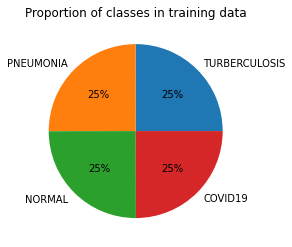

In [ ]:
pd.Series(train_labels).apply(lambda x: label_dict[x]).value_counts().plot(kind='pie', autopct="%0.0f%%", title = 'Proportion of classes in training data');

# Proposed Solution

We propose to build classification model since we predict discrete class labels(4 type chest x-ray) which are normal, Pneumonia,Covid-19,Tuberculosis based on the dataset that contains 7135 x-ray images. Our solution will involve multiple machine learning algorithms which are KNN, SVM, random forest, and CNN. Our solution is applicable for several reasons:

- CNN: We'll use CNN as our benchmark model to compare with K-NN, random forest, and SVM. CNN is designed to be spatially invariant in images, they can recognize the same patterns or features regardless of their position in the image. They are therefore well-equipped to deal with changes in chest X-ray images, which might change depending on the patient's position, the amount of exposure, and other elements.

- SVM: SVM work by finding the hyperplane that best separates the classes in the dataset. We plan to use one vs rest for our multi-label classification task. The main reason that we choose to use SVM is because of its effectiveness for high-dimensional data, while our data has a large number dimensions, since each pixel in an image represents a feature. It’s robust to overfitting and good enough for performance which means it can perform well on unseen image. Therefore, SVM suits our image classification task very well. Moreover, We use SVM by implementing pca using sklearn PCA package. The primary reason is when we train SVM, it took a long time to finish due to the high dimension of data, then we implement the PCA which can help reduce the number of dimensions while still retaining important information and also PCA can be used to extract important features from images.

- K-NN: It is a simple and effective on training algorithm. Since k-NN algorithm can handle non-linear decision boundaries, which is important when dealing with complex and heterogeneous data such as chest X-rays images. It can classify a new input image, examine the k-closest training data points to this image and assign the image to the most frequently occurring class. Moreover, We use K-NN by implementing pca using sklearn PCA package. The primary reason is it took a long time to train model due to the high dimension of data, then we implement the PCA which can help reduce the number of dimensions while still retaining important information and also PCA can be used to extract important features from images.

- Random forest: It is an ensemble learning algorithm that constructs multiple decision trees and then aggregates their predictions. It’s a robust model. It has good enough performance and is fast to train. Each node selects from a random subset of features and the model can give estimates of what features are important. The image data usually a large number of features, and random forest itself can perform feature selection for us without the need for other forms of feature selection. Moreover, We use random forest by implementing pca using sklearn PCA package. The primary reason is it took a long time to train model due to the high dimension of data, then we implement the PCA which can help reduce the number of dimensions while still retaining important information and also PCA can be used to extract important features from images.

To select the best hyper-parameters, we could perform grid search for each model, by doing k-fold cross-validation to validate the performance of different combinations of hyper parameters. Using these best hyper-parameters, we could evaluate the performance of each model by testing them on the test set. We plan to implement the models using the sklearn Python library in a way that is reproducible. In summary, our solution is applicable.

How the solution will be tested:
- To evaluate the performance of the solution, we will utilize a test set that is distinct and separate from the training set. The solution will then be tested on this set by applying the following evaluation metrics: f1-score, recall, precision, and accuracy. Specifically, we will focus on measuring recall, as this metric will indicate the proportion of positive cases that were correctly identified by the model. Then check which model has higher recall which means that more of the positive cases were correctly identified by the model. Ultimately, the model with the highest recall will be deemed the most effective solution for diagnosing COVID-19 based on X-ray images. The best model is the one with the highest recall scores among all the categories. 


# Evaluation Metrics

We will use recall as our primary evaluation metrics. Recall is also known as true positive rate, and it measures a model’s ability to correctly recognize all positive cases out of all actual positive cases in the datasets. It is calculated by TP / (TP + FN), where TP means the number of true positive cases and FN means the number of false negative cases. Recall is commonly used in classification tasks such as disease diagnosis. Recall suits our task well, because we want to prevent the cases of false negative from happening. For example, we don’t want positive patient to be classified as negative. Such mistake may generate undesirable outcome, since a positive patient can infect others, and also they usually need timely treatment for the fastest recovery.

# Results

## Performance of Benchmark Model (CNN)
The details can be found [here](https://github.com/COGS118A/Group016-Wi23/blob/main/CNN%20image%20classification%20(2).ipynb) in this file. 

We have implemented CNN for X-ray image classification as our benchmark model.
1. Training: We used 10 epochs and picked recall as the evaluation metric.
<p align="left">
<img src = 'img1.png' width = 70% height = 70%>
</p >


2. Classification results:

<img src = 'img4.png' width = 70% height = 70%>

From the classification results, we can see that the model predicts COVID-19, pneumonia, and tuberculosis well with a racall rate above 90%; however, for normal patients, the model does not work as well and ended up with a recall rate less than 50% despite our effort to balance out the traning image dataset. This is likely because normal patients' chest x-ray images vary in appearance, and some features of the normal patients' chest image are associated with pneumoina. A low recall rate for the normal category means many patients will be classified as having pneumonia while they do not. This is tolerable as our goal is to avoid low recall rates in classifying the other three categories, particularly COVID-19 because it is highly contagious. Other than this, the precision rate of the models are around 70% to 80%, with normal x-ray images having the hightest rate of above 90%. 

3. Confusion Matrix: 

<img src = 'img3.png' width = 70% height = 70%>

We have found that for Normal patients’ chest X-ray images, the CNN model tends to predict them as pneumonia. In our case, we do not want a high false negative rate because this means a lot of patients will be contagious without being diagnosed. On the other hand, false positives can be tolerated. Therefore, this result is tolerable. Luckily, for COVID-19 (which is our main focus), the prediction result is satisfactory.


4. Feature selection:

<img src = 'img5.png' width = 70% height = 70%>

We used tf.keras.preprocessing.image.ImageDataGenerator to extract feature data from the X-ray images. This class allows us to directly transfer raw images into manipulatable data for training, validating, and testing.


4. Recall curve:

![LearningCurve_recall.png](LearningCurve_recall.png)

The recall curve indicates that, during the training process, the recall rates for the model increased the fastest during the first two epochs, and gradually increase until the 10th epoch. 

### Performance of Model #2 (Support Vector Machine)
The details can be found [here](https://github.com/COGS118A/Group016-Wi23/blob/main/SVM_KNN_RFC.ipynb) in the first part of the file. 

1. Process: the process of grid search cross-validation (GridSearchCV) and support vector machine (SVM) using the SVC model. We will also examine the parameters used in this model and the best parameters obtained from the grid search.

![image](training_svm.png)

2. Classification results: We can observe from the provided image below, with the exception of PNEUMONIA(high recall 0.925641), the model has a low recall for all classes. The model misses a lot of COVID19 instances since the recall for COVID19 is only 0.009434. The recall for TUBERCULOSIS is also 0, meaning that no instances of this class were properly classified by the model. We can conclude that SVM is not a very good modeler of our dataset.

![image](svm_table.png)

3. Confusion matrix: We have 106 COVID-19 data, but we only predict 1 as COVID-19, while it misclassified 14 instances as NORMAL and 91 instances as PNEUMONIA. The model is not able to identify any cases of TUBERCULOSIS, all 41 TUBERCULOSIS labels misclassfication. 361 out of 390 PNEUMONIA patients predict correctly, the prediction result is satisfactory.

![image](svm_confusion_matrix.png)



### Performance of Model #3 (K-NN)
The details can be found [here](https://github.com/COGS118A/Group016-Wi23/blob/main/SVM_KNN_RFC.ipynb) in the second part of the file. 

![knn_code](knn_code.png)

This code performs k-Nearest Neighbors classification on the input `train_data` using the `sklearn.neighbors.KNeighborsClassifier`. It first sets up a `param_grid` dictionary to search over different combinations of hyperparameters using the `GridSearchCV` function. Specifically, it varies the number of neighbors (n_neighbors) and the leaf size. The performance of the model is evaluated using the `recall_macro` score, which calculates the average recall across all classes. The function performs 3-fold cross-validation.

The `model_grid.best_estimator_ is` used to store the best performing model based on the hyperparameters searched. This model is used to print the best recall and the corresponding best hyperparameters.

![KNNRecall_Result](KNNRecall_Result.png)

From the result we can make the following analysis regarding the performance of the KNN model:

- The recall score of 0.8198 indicates that the model was able to correctly identify about 82% of all positive cases. This is a good result, but the actual performance of the model also depends on the specific problem and dataset being used. The value of best parameters indicates that the model was able to effectively prune the search space for finding nearest neighbors.

- A high recall score is desirable in this case because it indicates that the  KNN model is correctly identifying a large proportion of COVID-positive cases in the dataset. This is important because false negatives (i.e., COVID-positive cases that are incorrectly identified as COVID-negative) can have serious consequences in terms of the diagnosis and treatment of COVID-19.Overall, the KNN model performed well with a recall score of 0.82, indicating that it was able to correctly identify a high proportion of positive cases. The hyperparameters used in training the model have contributed to this good performance.

And then we analyzed other metrics, such as precision, accuracy, and F1 score, to obtain a more comprehensive understanding of the performance of KNN. 

![KNN_Precision](KNN_Precision.png)

![KNN_Report](KNN_Report.png)

From the KNN classification report, we can see that the precision, recall, and F1-score for the COVID19 class are 0.747899, 0.839623, and 0.791111, respectively. The precision indicates that 74.79% of the predicted COVID19 cases were actually COVID19. The recall suggests that the model correctly identified 83.96% of the actual COVID19 cases, while the F1-score represents the balance between precision and recall.

Overall, the results suggest that the KNN model performs relatively well in predicting COVID19 cases, but there is still room for improvement. One possible way to improve the performance could be by incorporating more features or refining the feature selection process. It's also worth noting that the dataset used for training and testing the model can have an impact on the model's performance, and therefore, the results should be interpreted with caution.

A confusion matrix could be calculated to show how the classifier performs on the test data. Our focuses on finding the best hyperparameters based on recall_macro score. We have 106 COVID-19 data. Out of these, 89 were predicted as COVID-19. However, 2 instances were misclassified as NORMAL, 6 instances as PNEUMONIA and 9 instances as TUBERCULOSIS. Out of 390 PNEUMONIA patients, 358 were predicted correctly. The prediction result is satisfactory.

![KNN_Matrix](KNN_Matrix.png)


### Performance of Model #4 (Random Forest)
The details can be found [here](https://github.com/COGS118A/Group016-Wi23/blob/main/SVM_KNN_RFC.ipynb) in the third part of the file. 
The Random Forest Classifier (RFC) model was trained and tested using the `RandomForestClassifier` from the `sklearn.ensemble` package. A `param_grid` dictionary was set up to perform a grid search over different combinations of hyperparameters using the `GridSearchCV` function. Specifically, it varied the maximum depth (`max_depth`) and the number of estimators (`n_estimators`). The performance of the model was evaluated using the `recall_macro` score, which calculates the average recall across all classes. The function performed 3-fold cross-validation.

The `model_grid.best_estimator_` was used to store the best-performing model based on the hyperparameters searched. This model was used to print the best recall and the corresponding best hyperparameters:

- Best recall: 0.8835908756438559
- Best parameters: {'max_depth': 12, 'n_estimators': 100}

#### Classification Report

The classification report provides the following performance metrics for the Random Forest Classifier model:

|                | precision | recall  | f1-score | support   |
|----------------|-----------|---------|----------|-----------|
| COVID19        | 0.848214  | 0.896226| 0.871560 | 106.000000 |
| NORMAL         | 0.862903  | 0.457265| 0.597765 | 234.000000 |
| PNEUMONIA      | 0.804878  | 0.930769| 0.863258 | 390.000000 |
| TURBERCULOSIS  | 0.464286  | 0.951220| 0.624000 | 41.000000  |
| **accuracy**   |           |         | 0.783398 | 0.783398   |
| **macro avg**  | 0.745070  | 0.808870| 0.739146 | 771.000000 |
| **weighted avg** | 0.810335 | 0.783398| 0.771099 | 771.000000 |

#### Confusion Matrix

We have 106 COVID-19 data, and predict 95 as COVID-19, while it misclassified 1 instances as NORMAL, 3 instances as PNEUMONIA and 7 instance as TUBERCULOSIS. 363 out of 390 PNEUMONIA patients predict correctly, the prediction result is satisfactory. A heatmap of the confusion matrix was plotted to visualize the performance of the model:

![Confusion Matrix](cm_rf.png)

#### Performance Analysis

From the results, we can make the following analysis regarding the performance of the Random Forest Classifier model:

1. The overall accuracy of 0.783398 indicates that the model was able to correctly classify about 78.34% of the instances in the test set.

2. The recall_macro score of 0.808870 implies that the model was able to correctly identify approximately 80.89% of positive cases for each class, on average.

3. The precision and recall scores for each class vary, with some classes like COVID19 and PNEUMONIA having relatively high recall scores, while others like NORMAL and TURBERCULOSIS have lower recall scores. This may suggest that the model is better at identifying certain classes compared to others.

4. The best parameters found during the grid search were a `max_depth` of 12 and `n_estimators` of 100, indicating that these parameters yielded the best recall_macro score during cross-validation.


### Analysis the results

# Discussion

First point: In CNN, random forest, and KNN, we have observed that the recall scores are all satisfactory except for normal x-ray chest images. In the confusion matrix shown in the above sections, it seems some of the normal x-ray images are classified as pneumonia images. Upon inspecting our image data, we have found that the x-ray images of normal patients' chest and that of the pneumonia patients do look very similar. (The first image is the normal x-ray image and the second one is the pneumonia image.)

![normal](normal.png)![pneumonia](pneumonia.png)

Secondary point 1: Given that our group's primary focus is on classifying images to diagnose COVID-19, our emphasis is on having a high recall rate for classifying COVID-19 images. All three models above have done this job with a satifactory recall for COVID-19. In terms of the low recall rate of normal patients, this will lead to many patients being diagnosed to have pneumonia, which is not ideal. But this is far less harmful than having a high false negative rate for COVID-19 which means many COVID positive patients are not diagnosed and remain contagious in society. 

Secondary point 2: For SVM, The model's poor performance on the COVID-19 class indicates that it may require further data or fine-tuning to increase its capacity to correctly detect COVID-19 cases. While the model is performing relatively well in terms of identifying the NORMAL class's true positives, it is also making a significant number of false positive errors, which can have serious consequences in real-world applications. On the other hand, The model is unable to detect any TUBERCULOSIS cases, which may prevent patients from obtaining the proper care and may also cause the disease to spread. It implies that more fine-tuning or retraining of the model using a more varied and balanced dataset may be necessary to improve its ability to detect TUBERCULOSIS instances. For PNEUMONIA, the prediction result is satisfactory. We discussed together that SVM is the most suitable for the binary classification problems, which is the main reason for these problems.

Overall, we can come up with the conclusion that CNN has the best performance among all models, which has the highest recall scores.


#### Limitations
First of all, we try to fit a PCA transformation on both training and testing set, but this action will crash the kernel, until now, we couldn't find the reasons and solutions for this issue. That's the main reason we fit PCA transformation on training set.

![image](pca.png)
Based on the results of the different models, there are some limitations and problems with the work. Firstly, the recall score for COVID-19 is not very good for any of the models, which means there is a risk of misdiagnosis, and the models may miss some positive cases. This is especially problematic for COVID-19, as prompt and accurate diagnosis is crucial for preventing further spread of the disease.

Additionally, the SVM model performed poorest among all the models, with a low recall score for COVID-19, while the CNN model tended to predict normal patients as having pneumonia, which is not ideal. These limitations suggest that the models may benefit from more fine-tuning of hyperparameters or additional data.

It is possible that more data could improve the performance of the models, especially for COVID-19, as the number of positive cases in the dataset is relatively small compared to the other categories. Exploring more hyperparameters could also lead to better performance and more accurate predictions.



#### Ethics & Privacy

Our project used different sets of data including images from different categories of patients chest X-ray images. These datasets can be collected from Kaggle. These data sets include enough images that include different classes of categories that are able to help us for the training. However, the biases that may be resulting from our analysis and training are inaccurate, which include some images not clear enough and bad image quality. To fix this issue, we also need to think about avoiding using poor-quality images for training to ensure the best result. Another bias that also might affect our final result is that our model might not ensure we get an accurate result, to fix the issue we also need to consider using an appropriate model for our project.

In order to protect personal data, be only use public data from online, and we’ll ensure all the data that we used will not reveal any sensitive personal information.Meanwhile, we will use their data for this project research only and not for any commercial use. The dataset we’ll collect for this project is anonymous and unable to reveal any personal information. Thus, these processes ensured that personal privacy was not violated. Ethically, we will make sure to explain all of the analysis honestly and accurately. Since the datasets we’ll collect are public to use, we haven’t found any that are problematic in terms of data privacy and equitable impact. If any new datasets we added later could result problematic, we’ll mask all sensitive information that could/can reveal personal information


# Footnotes
<a name="Lecunnote"></a>1.[^](#Lecun): LeCun, Yann, et al. "Deep Learning." Nature, vol. 521, no. 7553, 2015, pp. 436-444, doi: 10.1038/nature14539.<br> 
<a name="Russakovsky"></a>2.[^](#Russakovsky): Russakovsky, Olga, et al. "ImageNet Large Scale Visual Recognition Challenge." International Journal of Computer Vision, vol. 115, no. 3, 2015, pp. 211-252, doi: 10.1007/s11263-015-0816-y.<br>
<a name="Wang"></a>3.[^](#Wang): Wang, S., Kang, B., Ma, J., Zeng, X., Xiao, M., Guo, J., ... & Liang, Z. (2021). A deep learning algorithm using CT images to screen for Corona Virus Disease (COVID-19). medRxiv.<br>
<a name="Council"></a>4.[^](#Council): International Council of Nurses. "COVID-19: ICN Calls for Urgent Support for Nurses to Ensure Global Health Security." 2021, https://www.icn.ch/system/files/2021-01/PR%20ICN%20calls%20for%20urgent%20support%20for%20nurses%20to%20ensure%20global%20health%20security.pdf.<br> 
<a name="Khan"></a>5.Khan, Khizar. "Lungs Disease Prediction: CNN Transfer Learning." Kaggle, Kaggle Inc., 23 Apr. 2021, https://www.kaggle.com/code/khizarkhan/lungs-disease-prediction-cnn-transfer-learning.